In [1]:
import os
from keras import models
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.chdir('C:/Users/shrig/Downloads/Signature/signature_data_one_shot')

In [3]:
model = models.load_model('signature_model')

In [4]:
def show_images(path_img_1, path_img_2):
    img1 = cv2.imread(path_img_1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(path_img_2, cv2.IMREAD_GRAYSCALE)

    cv2_imshow(img1)
    cv2_imshow(img2)

In [5]:
def check_forgery(path_img_1, path_img_2):
    img1 = cv2.imread(path_img_1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(path_img_2, cv2.IMREAD_GRAYSCALE)
    width = 650
    height = 268
    dim = (width, height)

    # resize image
    img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)
    img2 = cv2.resize(img2, dim, interpolation = cv2.INTER_AREA)
    fig, ax = plt.subplots(1,2)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    ax[0].imshow(img1);
    ax[1].imshow(img2);
    plt.show()

    img1 = img1.reshape((1, 268, 650, 1))
    img2 = img2.reshape((1, 268, 650, 1))
    img1 = img1.astype('float32') / 255
    img2 = img2.astype('float32') / 255
    result = model.predict([img1, img2])
    diff = result[0][0]
    print("Difference Score", diff)
    if model.predict((img1, img2))[0][0] >=0.5:
        return 'Genuine Signatures'
    else:
        return 'Forged Signatures'
     

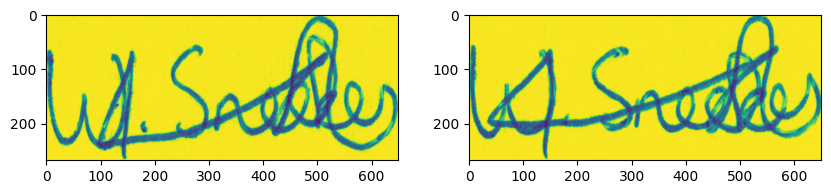

1/1 [==============================] - 0s 290ms/step
Difference Score 0.62240547
1/1 [==============================] - 0s 287ms/step


'Genuine Signatures'

In [7]:
check_forgery('test_data/068/01_068.png', 'test_data/068/02_068.PNG')

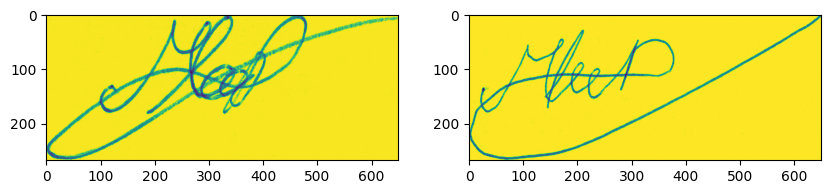

1/1 [==============================] - 0s 279ms/step
Difference Score 2.8153284e-17
1/1 [==============================] - 0s 277ms/step


'Forged Signatures'

In [8]:
check_forgery('test_data/064/05_064.png', 'test_data/064_forg/01_0203064.PNG')

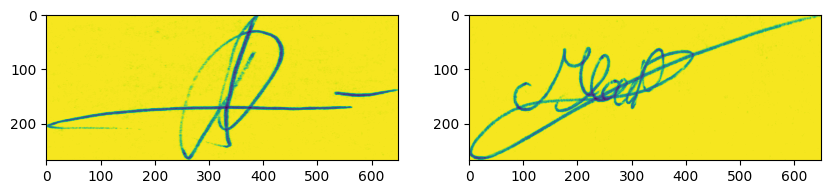

1/1 [==============================] - 0s 460ms/step
Difference Score 0.62245154
1/1 [==============================] - 0s 283ms/step


'Genuine Signatures'

In [9]:
check_forgery('test_data/063/01_063.png', 'test_data/064/01_064.PNG')

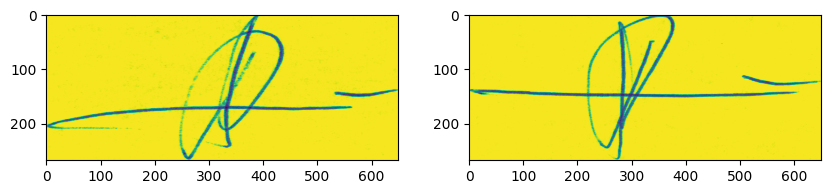

1/1 [==============================] - 0s 327ms/step
Difference Score 0.62247396
1/1 [==============================] - 0s 287ms/step


'Genuine Signatures'

In [13]:
check_forgery('test_data/063/01_063.png', 'test_data/063/08_063.PNG')

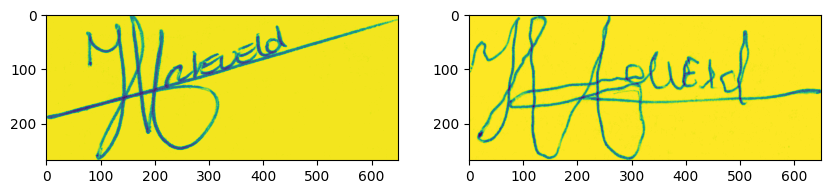

1/1 [==============================] - 0s 303ms/step
Difference Score 5.6575678e-30
1/1 [==============================] - 0s 267ms/step


'Forged Signatures'

In [15]:
check_forgery('test_data/065/05_065.png', 'test_data/065_forg/01_0118065.PNG')